In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [21]:
df = pd.read_csv('Churn_Modelling.csv')


In [22]:
print("Shape",df.shape)
print("Columns",df.columns.tolist())
df.head()

Shape (10000, 14)
Columns ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
# 4) Select features (X) and target (y)
feat_cols = ['CreditScore','Age','Tenure','Balance',
             'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
X = df[feat_cols]
y = df['Exited']


In [29]:
print("Class counts:\n", y.value_counts())

Class counts:
 Exited
0    7963
1    2037
Name: count, dtype: int64


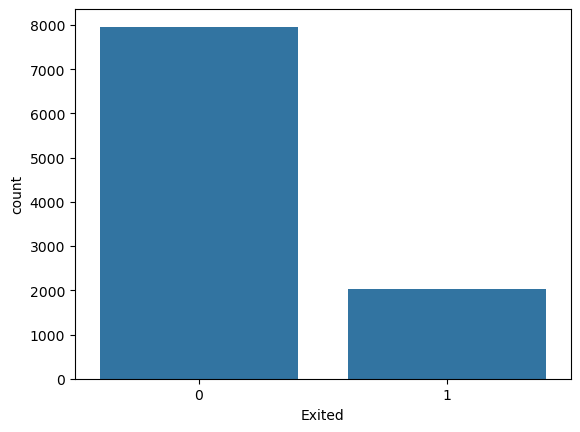

In [31]:
sns.countplot(x = y)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)



In [34]:
# 7) Scale features (fit on train, transform both)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [38]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),
    activation='relu',
    max_iter=100,
    random_state=0
)
mlp.fit(X_train_scaled, y_train)

C:\Users\paras\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [39]:
y_pred = mlp.predict(X_test_scaled)

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8252

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      1991
           1       0.59      0.48      0.53       509

    accuracy                           0.83      2500
   macro avg       0.73      0.70      0.71      2500
weighted avg       0.81      0.83      0.82      2500



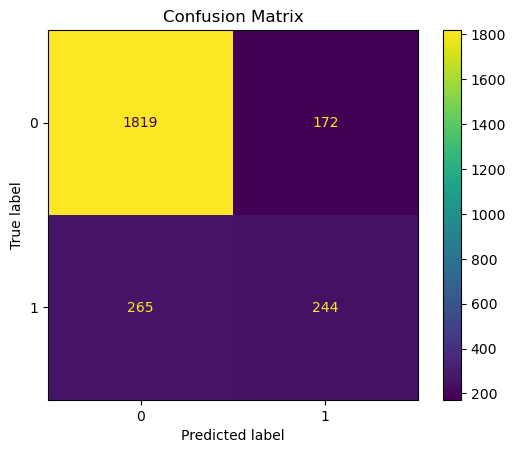

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()